# Synthesize a Table (CTGAN)

In this notebook, we'll use the SDV to create synthetic data for a single table and evaluate it. The SDV uses machine learning to learn patterns from real data and emulates them when creating synthetic data.

We'll use the **CTGAN** algorithm to do this. CTGAN uses generative adversarial networks (GANs) to create synthesize data with high fidelity.

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


# 0. Installation

Install the SDV library.


In [ ]:
%pip install sdv

<font color="maroon"><b>IMPORTANT!</b> When this is finished, <b>please restart the runtime</b> by clicking on Runtime, and then Restart runtime in the top menu bar.</font>

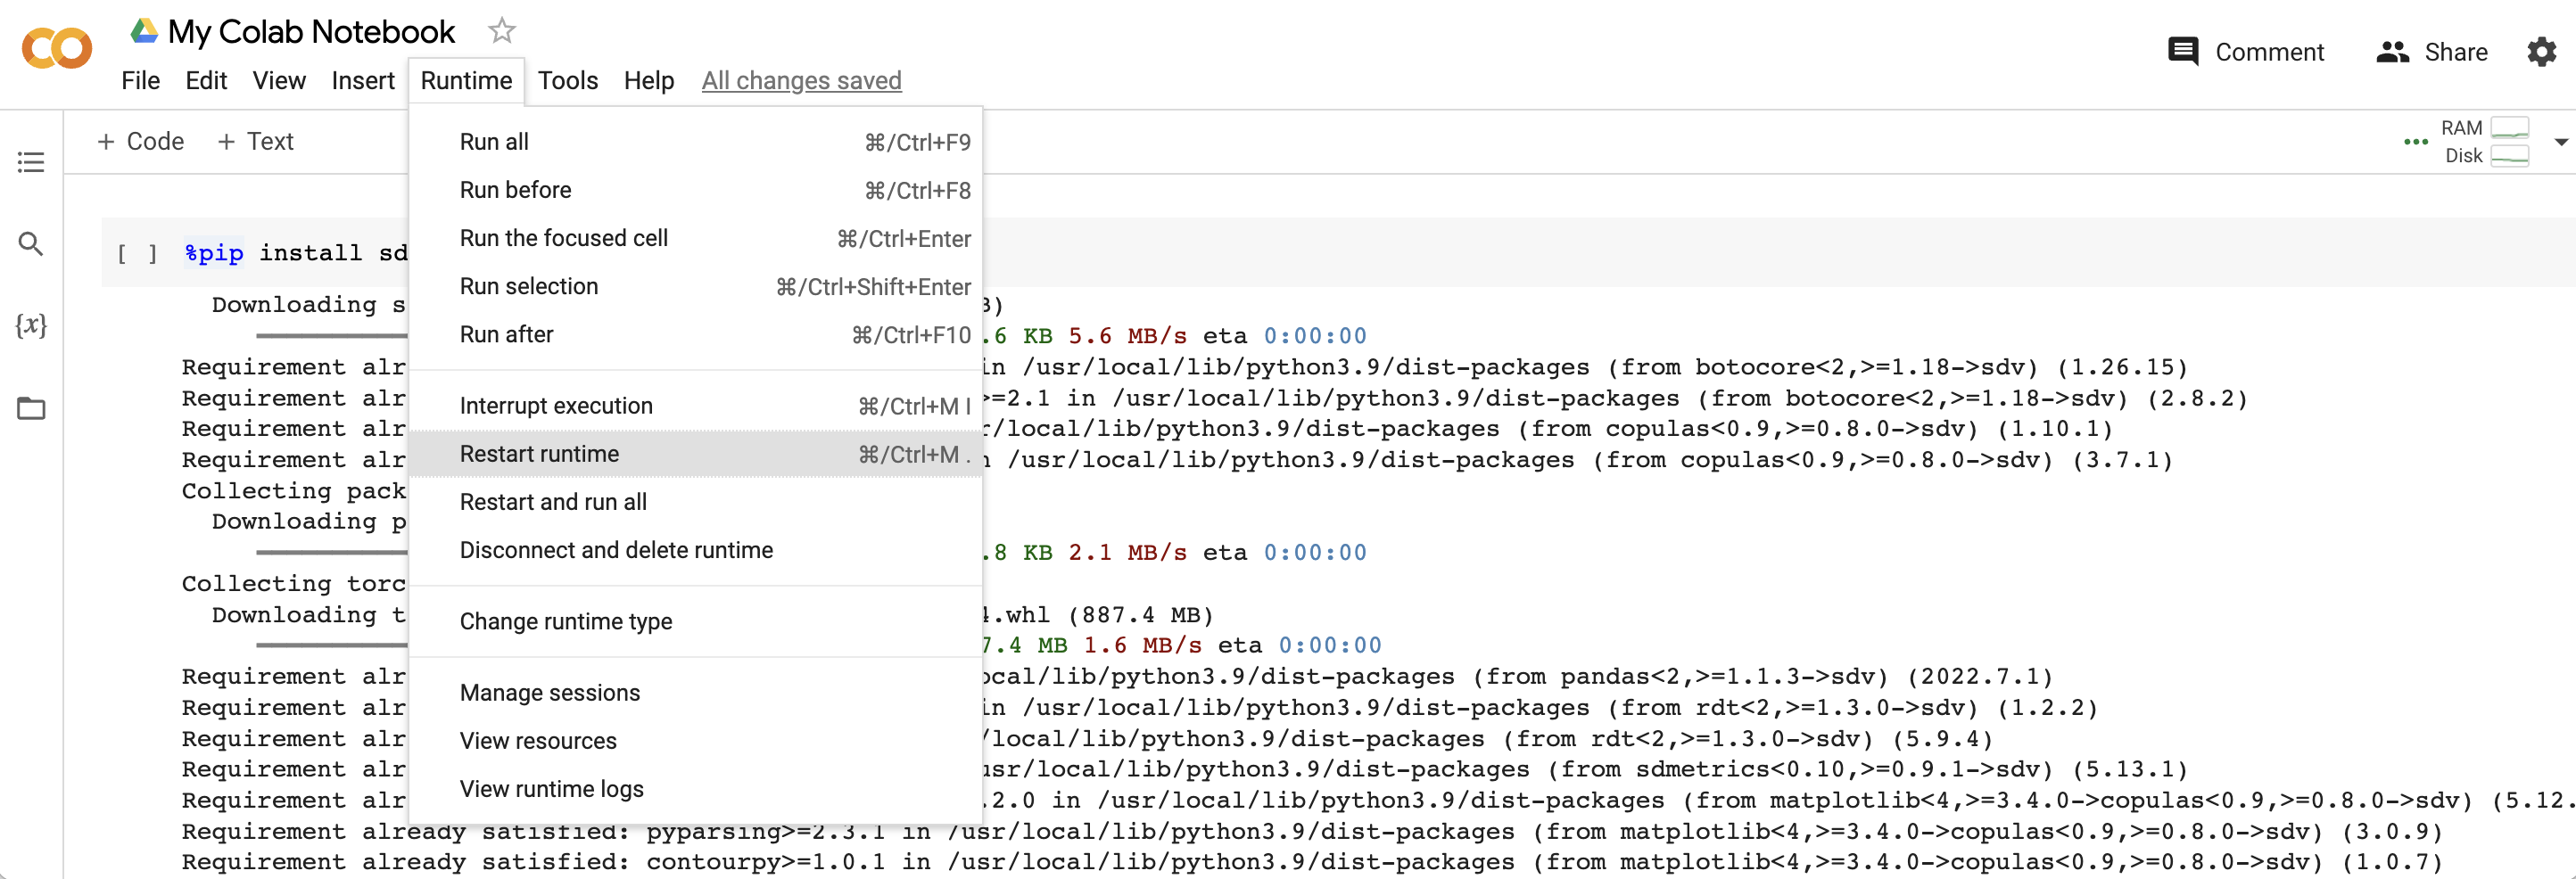

# 1. Loading the demo data
For this demo, we'll use a fake dataset that describes some fictional guests staying at a hotel.

In [ ]:
import pandas as pd
from sdv.datasets.local import load_csvs
from sdv.metadata import SingleTableMetadata
from sklearn.ensemble import IsolationForest


drive.mount('/content/drive')

# assume that my_folder contains 1 CSV file named 'guests.csv'
datasets = load_csvs('/content/drive/MyDrive/Tester')

# the data is available under the file name
fraud_table = datasets['train']

metadata = SingleTableMetadata()

metadata.detect_from_dataframe(data=fraud_table)


features = ['V1', 'V5', 'V10', 'V4']

isolation_forest = IsolationForest(n_estimators=100, contamination=0.05)
isolation_forest.fit(fraud_table[features])
anomaly_scores = isolation_forest.decision_function(fraud_table[features])
fraud_table['AnomalyScore'] = anomaly_scores
threshold = fraud_table['AnomalyScore'].quantile(0.95)
anomaly_data = fraud_table[fraud_table['AnomalyScore'] > threshold]
anomaly_data = anomaly_data.reset_index(drop=True)
anomaly_data = anomaly_data.reset_index(drop=True)

portion = 1/50
sampled_data = anomaly_data.sample(frac=portion, random_state=42)

sampled_data = sampled_data.reset_index(drop=True)

fraud_df=fraud_table[fraud_table['Class'] == 1]

print(fraud_df.shape)



#print(sampled_data.shape)

#frauds = pd.concat([fraud_df, sampled_data], ignore_index=True)
#frauds = frauds.reset_index(drop=True)

frauds = fraud_df

print(frauds.shape)



metadata = SingleTableMetadata()

metadata.detect_from_dataframe(data=frauds)

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning:

X does not have valid feature names, but IsolationForest was fitted with feature names



(469, 33)
(469, 33)


**Details**: The data is available as a single table.
- `guest_email` is a _primary key_ that uniquely identifies every row
- Other columns have a variety of data types and some the data may be missing.

In [ ]:
frauds.head()

,id,Time,V1,V2,V3,V4,V5,V6,V7,V8,...,V22,V23,V24,V25,V26,V27,V28,Amount,Class,AnomalyScore
1681,1681,764.0,0.845797,-1.063059,0.120133,-0.312570,-0.056194,1.944391,-0.661839,0.582721,...,-0.919078,0.123612,-1.420935,-0.072559,0.293439,0.061270,0.006448,136.58,1,0.138041
2039,2039,923.0,-1.808089,1.794735,-2.574549,-1.944174,-4.093440,-1.360198,-8.837694,-3.865127,...,1.173416,-0.136751,0.739760,-0.692745,0.818293,0.745100,0.847648,2.00,1,-0.095051
2090,2090,1028.0,-0.368027,1.492913,0.653399,0.164478,-1.043918,0.766250,-2.717382,-6.944203,...,1.185031,0.290564,0.528459,0.764303,-0.017768,0.110884,0.307835,0.12,1,0.090747
3072,3072,1328.0,1.990241,-0.185837,-1.039174,0.086245,0.107037,-0.409425,0.016713,-0.126446,...,-0.285513,0.263769,0.779628,-0.261358,0.255895,-0.074999,-0.059828,23.31,1,0.121061
3780,3780,1438.0,-0.738582,0.654464,0.652465,-0.139933,1.183689,-0.037131,0.638169,0.136502,...,0.563421,0.012614,-0.311213,0.105798,-0.252849,0.049231,0.108966,4.99,1,0.141525


The demo also includes **metadata**, a description of the dataset. It includes the primary keys as well as the data types for each column (called "sdtypes").

## How to load your data?

An example of how to do this can be found [here](https://docs.sdv.dev/sdv/single-table-data/data-preparation/loading-data)

# 2. Basic Usage

## 2.1 Creating a Synthesizer

An SDV **synthesizer** is an object that you can use to create synthetic data. It learns patterns from the real data and replicates them to generate synthetic data.

In [ ]:
from sdv.single_table import CTGANSynthesizer

#metadata = fraud_table.info

synthesizer = CTGANSynthesizer(metadata)
synthesizer.fit(frauds)

/usr/local/lib/python3.10/dist-packages/rdt/transformers/numerical.py:112: UserWarning:

No rounding scheme detected for column 'V1'. Data will not be rounded.

/usr/local/lib/python3.10/dist-packages/rdt/transformers/numerical.py:112: UserWarning:

No rounding scheme detected for column 'V2'. Data will not be rounded.

/usr/local/lib/python3.10/dist-packages/rdt/transformers/numerical.py:112: UserWarning:

No rounding scheme detected for column 'V3'. Data will not be rounded.

/usr/local/lib/python3.10/dist-packages/rdt/transformers/numerical.py:112: UserWarning:

No rounding scheme detected for column 'V4'. Data will not be rounded.

/usr/local/lib/python3.10/dist-packages/rdt/transformers/numerical.py:112: UserWarning:

No rounding scheme detected for column 'V5'. Data will not be rounded.

/usr/local/lib/python3.10/dist-packages/rdt/transformers/numerical.py:112: UserWarning:

No rounding scheme detected for column 'V6'. Data will not be rounded.

/usr/local/lib/python3.10/dist-pac

<font color="maroon"><i><b>This step takes a few minutes.</b> For larger datasets, this phase may take longer. A drawback of a GAN-based model like CTGAN is performance.</i></font>

When this code finishes running, the synthesizer is ready to use.

## 2.2 Generating Synthetic Data
Use the `sample` function and pass in any number of rows to synthesize.

In [ ]:
synthetic_data = synthesizer.sample(num_rows=500)
synthetic_data.head()

,id,Time,V1,V2,V3,V4,V5,V6,V7,V8,...,V22,V23,V24,V25,V26,V27,V28,Amount,Class,AnomalyScore
0,24114,81307.0,2.169813,-1.420391,-1.745570,0.102593,-0.395639,-2.078725,0.643747,0.359719,...,-0.040109,-0.761357,0.727225,1.432854,0.037693,-0.186515,0.280922,25.73,1,0.074369
1,214840,90726.0,-0.954051,4.694751,-3.265907,-0.173026,1.090667,-2.686094,2.523027,-7.341355,...,2.161394,0.061832,0.564533,-0.189884,0.230060,0.017585,-0.396104,21.68,1,-0.028689
2,185933,22041.0,0.139552,-1.749203,0.321927,-4.044858,6.524288,-2.989053,-13.806162,0.502433,...,-0.930451,-0.518294,0.741557,-1.624377,0.143809,0.064464,-0.013875,0.00,1,-0.174078
3,92700,92072.0,1.945870,0.126108,-0.454588,-4.044858,4.131982,-2.250583,10.449013,0.471064,...,-0.243079,-0.626027,0.572658,-0.308346,0.076077,-0.015269,-0.101179,0.00,1,0.010590
4,54745,87359.0,1.920196,4.002528,-7.447467,-1.091101,0.303755,-2.944261,2.362701,-0.287334,...,0.619634,-1.685101,0.319999,0.910397,0.101996,-0.290190,0.901220,0.00,1,0.132676


In [ ]:
frauds.head()

,id,Time,V1,V2,V3,V4,V5,V6,V7,V8,...,V22,V23,V24,V25,V26,V27,V28,Amount,Class,AnomalyScore
1681,1681,764.0,0.845797,-1.063059,0.120133,-0.312570,-0.056194,1.944391,-0.661839,0.582721,...,-0.919078,0.123612,-1.420935,-0.072559,0.293439,0.061270,0.006448,136.58,1,0.138041
2039,2039,923.0,-1.808089,1.794735,-2.574549,-1.944174,-4.093440,-1.360198,-8.837694,-3.865127,...,1.173416,-0.136751,0.739760,-0.692745,0.818293,0.745100,0.847648,2.00,1,-0.095051
2090,2090,1028.0,-0.368027,1.492913,0.653399,0.164478,-1.043918,0.766250,-2.717382,-6.944203,...,1.185031,0.290564,0.528459,0.764303,-0.017768,0.110884,0.307835,0.12,1,0.090747
3072,3072,1328.0,1.990241,-0.185837,-1.039174,0.086245,0.107037,-0.409425,0.016713,-0.126446,...,-0.285513,0.263769,0.779628,-0.261358,0.255895,-0.074999,-0.059828,23.31,1,0.121061
3780,3780,1438.0,-0.738582,0.654464,0.652465,-0.139933,1.183689,-0.037131,0.638169,0.136502,...,0.563421,0.012614,-0.311213,0.105798,-0.252849,0.049231,0.108966,4.99,1,0.141525


The synthesizer is generating synthetic guests in the **same format as the original data**.

## 2.3 Evaluating Real vs. Synthetic Data
The synthetic data replicates the **mathematical properties** of the real data. To get more insight, we can use the `evaluation` module.

In [ ]:
from sdv.evaluation.single_table import evaluate_quality

#column_name = 'Class'
#synthetic_data[column_name].fillna(1, inplace=True)

quality_report = evaluate_quality(
    frauds,
    synthetic_data,
    metadata
)

Creating report:   0%|          | 0/4 [00:00<?, ?it/s]/usr/local/lib/python3.10/dist-packages/sdmetrics/column_pairs/statistical/correlation_similarity.py:78: ConstantInputWarning:

The real data in column 'Class' contains a constant value. Correlation is undefined for constant data.

/usr/local/lib/python3.10/dist-packages/sdmetrics/column_pairs/statistical/correlation_similarity.py:78: ConstantInputWarning:

The synthetic data in column 'Class' contains a constant value. Correlation is undefined for constant data.

/usr/local/lib/python3.10/dist-packages/sdmetrics/column_pairs/statistical/correlation_similarity.py:78: ConstantInputWarning:

The real data in column 'Class' contains a constant value. Correlation is undefined for constant data.

/usr/local/lib/python3.10/dist-packages/sdmetrics/column_pairs/statistical/correlation_similarity.py:78: ConstantInputWarning:

The synthetic data in column 'Class' contains a constant value. Correlation is undefined for constant data.

/usr/loc


Overall Quality Score: 80.58%

Properties:
Column Shapes: 67.51%
Column Pair Trends: 93.65%


In [ ]:
quality_report.get_details('Column Shapes')

,Column,Metric,Quality Score
0,id,KSComplement,0.904132
1,Time,KSComplement,0.898260
2,V1,KSComplement,0.623817
3,V2,KSComplement,0.647369
4,V3,KSComplement,0.681714
5,V4,KSComplement,0.523467
6,V5,KSComplement,0.481932
7,V6,KSComplement,0.530030
8,V7,KSComplement,0.587667
9,V8,KSComplement,0.703467


The report allows us to visualize the different properties that were captured. For example, the visualization below shows us _which_ individual column shapes were well-captured and which weren't.

In [ ]:
quality_report.get_visualization('Column Shapes')

## 2.4 Visualizing the Data
For more insights, we can visualize the real vs. synthetic data.

Let's perform a 1D visualization comparing a column of the real data to the synthetic data.

We can also visualize in 2D, comparing the correlations of a pair of columns.

## 2.5 Saving and Loading
We can save the synthesizer to share with others and sample more synthetic data in the future.

In [ ]:
synthesizer.save('my_synthesizer.pkl')

synthesizer = CTGANSynthesizer.load('my_synthesizer.pkl')

# 3. CTGAN Customization


## 3.1 Fine-tuning

When using this synthesizer, we can make a tradeoff between training time and data quality using the `epochs` parameter: Higher `epochs` means that the synthesizer will train for longer, and ideally improve the data quality.

In [ ]:
custom_synthesizer = CTGANSynthesizer(
    metadata,
    epochs=1000)
custom_synthesizer.fit(frauds)

/usr/local/lib/python3.10/dist-packages/rdt/transformers/numerical.py:112: UserWarning:

No rounding scheme detected for column 'V1'. Data will not be rounded.

/usr/local/lib/python3.10/dist-packages/rdt/transformers/numerical.py:112: UserWarning:

No rounding scheme detected for column 'V2'. Data will not be rounded.

/usr/local/lib/python3.10/dist-packages/rdt/transformers/numerical.py:112: UserWarning:

No rounding scheme detected for column 'V3'. Data will not be rounded.

/usr/local/lib/python3.10/dist-packages/rdt/transformers/numerical.py:112: UserWarning:

No rounding scheme detected for column 'V4'. Data will not be rounded.

/usr/local/lib/python3.10/dist-packages/rdt/transformers/numerical.py:112: UserWarning:

No rounding scheme detected for column 'V5'. Data will not be rounded.

/usr/local/lib/python3.10/dist-packages/rdt/transformers/numerical.py:112: UserWarning:

No rounding scheme detected for column 'V6'. Data will not be rounded.

/usr/local/lib/python3.10/dist-pac

<font color="maroon"><i><b>This code takes about 10 min to run.</b></i></font>

After we've trained our synthesizer, we can verify the changes to the data quality by creating some synthetic data and evaluating it.

In [ ]:
synthetic_data_customized = custom_synthesizer.sample(num_rows=500)

column_name = 'Class'
synthetic_data_customized[column_name].fillna(1, inplace=True)


quality_report = evaluate_quality(
    frauds,
    synthetic_data_customized,
    metadata
)

Creating report:   0%|          | 0/4 [00:00<?, ?it/s]/usr/local/lib/python3.10/dist-packages/sdmetrics/column_pairs/statistical/correlation_similarity.py:78: ConstantInputWarning:

The real data in column 'Class' contains a constant value. Correlation is undefined for constant data.

/usr/local/lib/python3.10/dist-packages/sdmetrics/column_pairs/statistical/correlation_similarity.py:78: ConstantInputWarning:

The synthetic data in column 'Class' contains a constant value. Correlation is undefined for constant data.

/usr/local/lib/python3.10/dist-packages/sdmetrics/column_pairs/statistical/correlation_similarity.py:78: ConstantInputWarning:

The real data in column 'Class' contains a constant value. Correlation is undefined for constant data.

/usr/local/lib/python3.10/dist-packages/sdmetrics/column_pairs/statistical/correlation_similarity.py:78: ConstantInputWarning:

The synthetic data in column 'Class' contains a constant value. Correlation is undefined for constant data.

/usr/loc


Overall Quality Score: 82.85%

Properties:
Column Shapes: 72.03%
Column Pair Trends: 93.67%


While GANs are able to model complex patterns and shapes, it is not easy to understand how they are learning -- but it is possible to modify the underlying architecture of the neural networks.

For users who are familiar with the GAN architecture, there are extra parameters you can use to tune CTGAN to your particular needs. For more details, see [the CTGAN documentation](https://docs.sdv.dev/sdv/single-table-data/modeling/synthesizers/ctgansynthesizer).

Other parameters for fine tuning:

- **generator_lr** - learning rate for the generator, a larger learning rate makes the model learn faster, but if it's too large, the model may overshoot the optimal point. (Default float = 0.0002)
- **generator_decay** - generator wight decay for the Adam Optimizer. This is a regularization term that's added to the loss function to prevent the weights from growing too large, which can lead to overfitting.(Default float = 0.000001)
- **discriminator_lr **- learning rate for the discriminator. Same as generator_lr but for discriminator. Usually they are the same. (Default float = 0.0002),
- **discriminator_decay** - discriminator weight decay for the Adam Optimizer (Default float = 0.000001),
- **batch_size** - number of data samples to process in each step. Larger batch size potentially leads to faster training, but require more memory (Default int = 500),
- **discriminator_steps** - number of discriminator updates to do for each generator update.( This is a parameter that can be used to balance the training of the generator and the discriminator.) [WGAN](https://arxiv.org/abs/1701.07875) paper default is 5. Default used is 1 to match original CTGAN implementation.
- **epochs** - number of training epochs (Default int = 300)

## 3.2 Conditional Sampling

In order to address data imbalance, synthetic data can be used to generate additional records of classes that are underrepresented in our dataset and needed for our downstream task.

In [ ]:
from sdv.sampling import Condition

suite_guests_with_rewards = Condition(
    num_rows=250,
    column_values={'room_type': 'SUITE', 'has_rewards': True}
)

In [ ]:
custom_synthesizer.sample_from_conditions(conditions = [suite_guests_with_rewards])

For more details, see [Conditional Sampling](https://docs.sdv.dev/sdv/single-table-data/sampling/conditional-sampling)

## 3.3 Constraints

In case if we have some special rules which we have to follow in our data we can desctibe them for our synthesizer

In [ ]:
checkin_checkout_constraint = {
    'constraint_class': 'Inequality',
    'constraint_parameters': {
        'low_column_name': 'checkin_date',
        'high_column_name': 'checkout_date'
    }
}

In [ ]:
synthesizer.fit(frauds)

/usr/local/lib/python3.10/dist-packages/rdt/transformers/numerical.py:112: UserWarning:

No rounding scheme detected for column 'V1'. Data will not be rounded.

/usr/local/lib/python3.10/dist-packages/rdt/transformers/numerical.py:112: UserWarning:

No rounding scheme detected for column 'V2'. Data will not be rounded.

/usr/local/lib/python3.10/dist-packages/rdt/transformers/numerical.py:112: UserWarning:

No rounding scheme detected for column 'V3'. Data will not be rounded.

/usr/local/lib/python3.10/dist-packages/rdt/transformers/numerical.py:112: UserWarning:

No rounding scheme detected for column 'V4'. Data will not be rounded.

/usr/local/lib/python3.10/dist-packages/rdt/transformers/numerical.py:112: UserWarning:

No rounding scheme detected for column 'V5'. Data will not be rounded.

/usr/local/lib/python3.10/dist-packages/rdt/transformers/numerical.py:112: UserWarning:

No rounding scheme detected for column 'V6'. Data will not be rounded.

/usr/local/lib/python3.10/dist-pac

In [ ]:
synthetic_data = synthesizer.sample(num_rows=500)
print(len(synthetic_data))

NameError: ignored

In [ ]:
synthetic_data

column_name = 'AnomalyScore'
dataset = synthetic_data.drop(column_name, axis=1)

dataset.to_csv('synthetic_data.csv', index=False)


For more details, see [Constraints](https://docs.sdv.dev/sdv/single-table-data/modeling/synthetic-data-workflow/constraints)

# 4. What's Next?

For more information about the CTGAN Synthesizer, visit the **[documentation](https://docs.sdv.dev/sdv/single-table-data/modeling/synthesizers/ctgansynthesizer)**.


---

# Copyrights

Additional notes and examples have been added by [AITAU](https://aitau.org/) for [Bootcamp](https://www.industrymeetsmakers.com/aitau-synthetic-data-challenge) purposes.


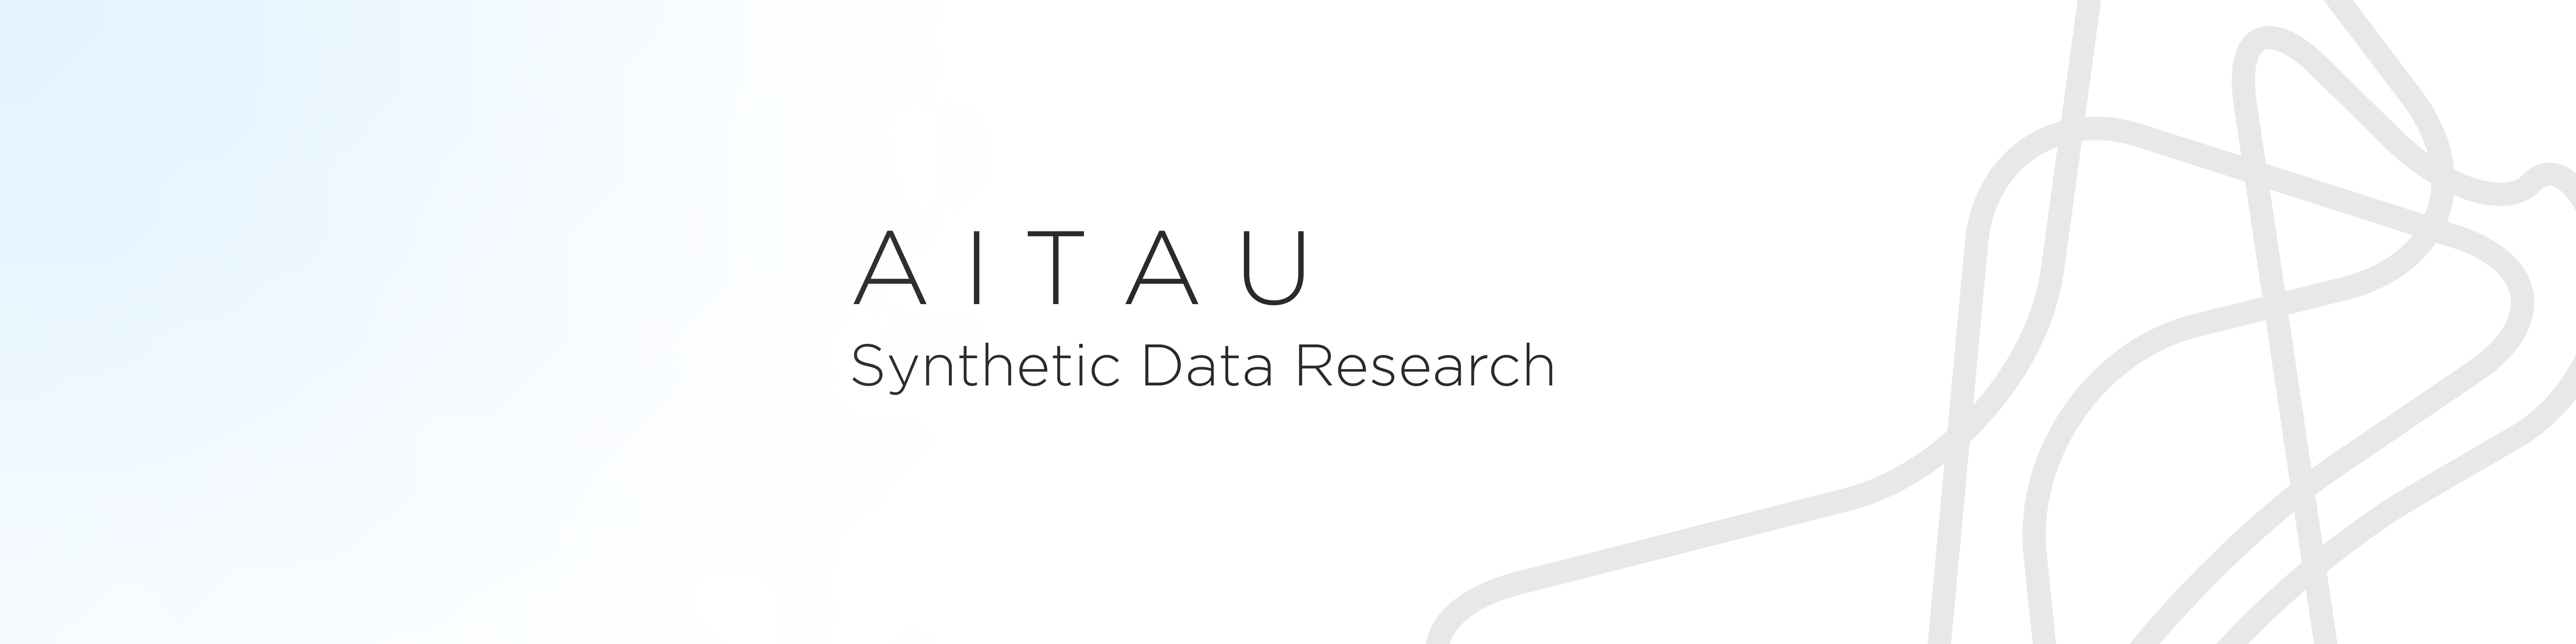

The original version of this notebook was created by the [Synthetic Data Vault Project](https://github.com/sdv-dev/SDV).

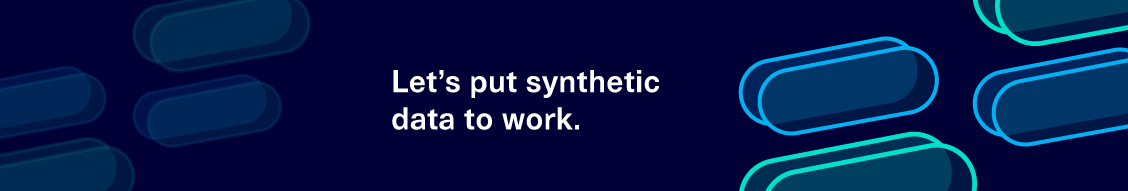